In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
## Loading dataset
df = pd.read_csv("name_gender_dataset.csv")

In [3]:
## checking Dataset
df.head(10)
#print(df_names[df_names['Count'] == 10])

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567
5,Mary,F,4169663,0.011411
6,David,M,3787547,0.010366
7,Joseph,M,2695970,0.007378
8,Richard,M,2638187,0.007220
9,Charles,M,2433540,0.006660


In [4]:
# To drop the columns where the count for male or female is smaller 

# Step 1: Group by Name and then keep the row with the highest Count within each group
def keep_max_count(group):
    return group.loc[group['Count'].idxmax()]

# Apply the function to each group
df_names = df.groupby('Name').apply(keep_max_count).reset_index(drop=True)

df_names.head(10)

,Name,Gender,Count,Probability
0,A,F,2,5.473480e-09
1,A'Aff,F,1,2.736740e-09
2,A'Aron,M,1,2.736740e-09
3,A'Dele,F,1,2.736740e-09
4,A'Isha,F,1,2.736740e-09
5,A'Ishah,F,1,2.736740e-09
6,A'Jana,F,1,2.736740e-09
7,A'Janae,F,1,2.736740e-09
8,A'Lmos,M,1,2.736740e-09
9,A'Nette,F,1,2.736740e-09


In [5]:
n_rows = df_names[df_names['Name'] == 'Boyde']
n_rows

,Name,Gender,Count,Probability
16723,Boyde,M,85,2.326230e-07


In [6]:
name_row = df[df['Name'] == 'Boyde']
name_row

,Name,Gender,Count,Probability
44071,Boyde,M,85,2.326230e-07


In [7]:
## Checking dimensions of the dataframe
print(df_names.shape)

(133910, 4)


In [8]:
df_names['length'] = df_names['Name'].str.len()
df_names.sort_values('length', ascending=True, inplace=True)
df_names.head(100)

,Name,Gender,Count,Probability,length
0,A,F,2,5.473480e-09,1
94371,P,M,6,1.642040e-08,1
13782,B,M,3,8.210220e-09,1
97891,R,F,1,2.736740e-09,1
47969,I,M,3,8.210220e-09,1
...,...,...,...,...,...
125392,Va,M,69,1.888350e-07,2
57393,Jl,M,37,1.012590e-07,2
32930,Dj,M,764,2.090870e-06,2
57375,Jj,M,544,1.488790e-06,2


In [9]:
df_names = df_names.sort_values(by='length', ascending=False)
df_names


,Name,Gender,Count,Probability,length
20117,Carmelo-Antonio-Francesco,M,1,2.736740e-09,25
105736,Sandrine-Marie-Madeleine,F,1,2.736740e-09,24
89351,Nathan-Conway-Barrington,M,1,2.736740e-09,24
80486,Maria-Mandy-Antoninetta,F,1,2.736740e-09,23
84178,Merlin-Siegfried-Daniel,M,1,2.736740e-09,23
...,...,...,...,...,...
18874,C,M,1,2.736740e-09,1
41501,G,M,2,5.473480e-09,1
92784,O,F,1,2.736740e-09,1
104207,S,M,2,5.473480e-09,1


In [10]:
## We founnd probability is useless here so we drop the column
df_names = df_names.drop('Probability', axis=1)
df_names

,Name,Gender,Count,length
20117,Carmelo-Antonio-Francesco,M,1,25
105736,Sandrine-Marie-Madeleine,F,1,24
89351,Nathan-Conway-Barrington,M,1,24
80486,Maria-Mandy-Antoninetta,F,1,23
84178,Merlin-Siegfried-Daniel,M,1,23
...,...,...,...,...
18874,C,M,1,1
41501,G,M,2,1
92784,O,F,1,1
104207,S,M,2,1


In [11]:
## Changing the gender to numerical classifiers

df_names['Gender'] = df_names['Gender'].replace({'M': 1, 'F': 0})
df_names.head(100)

,Name,Gender,Count,length
20117,Carmelo-Antonio-Francesco,1,1,25
105736,Sandrine-Marie-Madeleine,0,1,24
89351,Nathan-Conway-Barrington,1,1,24
80486,Maria-Mandy-Antoninetta,0,1,23
84178,Merlin-Siegfried-Daniel,1,1,23
...,...,...,...,...
79365,Malgosia-Dominique,0,1,18
118240,Tarlitah-Katreece,0,1,17
25195,Constantina-Maria,0,1,17
9086,Antonia-Elizabeth,0,1,17


In [12]:
## Remove names with one letter and bigger than 15
df_names.drop(df_names[df_names['length'] > 15].index, inplace = True)
df_names.drop(df_names[df_names['length'] == 1].index, inplace = True)
df_names

,Name,Gender,Count,length
106986,Seanchristopher,1,10,15
58514,Jordanchristoph,1,5,15
41559,Gabrielalexande,1,6,15
105285,Samantha-Evonne,0,1,15
95163,Patrick-Rajakna,1,1,15
...,...,...,...,...
103476,Ru,0,1,2
123855,Tu,1,357,2
133678,Zy,1,48,2
44862,Ha,0,468,2


In [13]:
# Group by all columns and calculate size (count) for each group
df_names.drop(df_names[df_names['Count'] <= 5].index, inplace = True)
df_names.sort_values(by="length", ascending=True).head(10)



,Name,Gender,Count,length
2528,Ah,1,75,2
93096,Ok,0,35,2
113312,So,0,56,2
29241,De,1,705,2
77079,Ly,0,304,2
37632,En,1,17,2
34190,Du,1,24,2
112989,Sj,1,11,2
47973,Ia,0,164,2
133060,Zi,0,98,2


In [14]:
df_names = df_names[~df_names['Name'].str.contains('-')]
df_names = df_names[~df_names['Name'].str.contains('@')]

## Check for special characters
import re
special_char_pattern = re.compile(r'[^a-zA-Z0-9 ]')
df_names['Has_Special_Char'] = df_names['Name'].str.contains(special_char_pattern)
df_clean = df_names[~df_names['Has_Special_Char']]
# df_cleaned = df_names[~df_names['Has_Special_Char']].drop(columns=['Has_Special_Char'])

df_clean['Has_Special_Char'] = df_clean['Name'].str.contains(special_char_pattern)
df_clean = df_clean.drop(columns='Has_Special_Char', axis =1)
df_clean


C:\Users\aldoe\AppData\Local\Temp\ipykernel_45092\1224574629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Has_Special_Char'] = df_clean['Name'].str.contains(special_char_pattern)


,Name,Gender,Count,length
106986,Seanchristopher,1,10,15
41559,Gabrielalexande,1,6,15
104002,Ryanchristopher,1,45,15
23690,Christiananthon,1,12,15
82341,Matthewalexande,1,11,15
...,...,...,...,...
97894,Ra,1,113,2
123855,Tu,1,357,2
133678,Zy,1,48,2
44862,Ha,0,468,2


In [15]:
## Null check
nan_check = df_clean.isna().sum()
nan_check

Name      0
Gender    0
Count     0
length    0
dtype: int64

In [16]:
## names to lowercase to dont have problems with letters 
df_clean['Name'] = df_clean['Name'].apply(lambda x: x.upper() if isinstance(x, str) else x)
df_clean.head(15)

,Name,Gender,Count,length
106986,SEANCHRISTOPHER,1,10,15
41559,GABRIELALEXANDE,1,6,15
104002,RYANCHRISTOPHER,1,45,15
23690,CHRISTIANANTHON,1,12,15
82341,MATTHEWALEXANDE,1,11,15
57955,JOHNCHRISTOPHER,1,132,15
23699,CHRISTIANMICHAE,1,11,15
23697,CHRISTIANJOSEPH,1,22,15
11422,ASHLEYELIZABETH,0,8,15
23796,CHRISTOPHERANTH,1,6,15


In [17]:
# df_names['l3_letters'] = df_names['Name'].str[-3:]
# df_names['l2_letters'] = df_names['Name'].str[-2:]
# df_names['l1_letters'] = df_names['Name'].str[-1:]
df_clean.sort_values(by="length", ascending=False).head(20)

## print(df_names.shape)

,Name,Gender,Count,length
106986,SEANCHRISTOPHER,1,10,15
23800,CHRISTOPHERJOHN,1,118,15
41559,GABRIELALEXANDE,1,6,15
80521,MARIADELROSARIO,0,22,15
80518,MARIADELOSANGEL,0,36,15
81014,MARKCHRISTOPHER,1,6,15
41120,FRANCISCOJAVIER,1,130,15
23691,CHRISTIANDANIEL,1,7,15
23806,CHRISTOPHERRYAN,1,11,15
23804,CHRISTOPHERMICH,1,59,15


In [18]:
# Function to convert string to ASCII values and pad with zeros if length is less than 5
def string_to_ascii_padded(s):
    ascii_values = [(ord(c)-64) for c in s]
    while len(ascii_values) < 15:
        ascii_values.append(0)
    return ascii_values

# Apply the function to the 'names' column
df_clean['encoded_names'] = df_clean['Name'].apply(string_to_ascii_padded)
## df_names = df_names.drop('names_ascii', axis=1)

df_clean['name_ascii'] = [','.join(map(str, l)) for l in df_clean['encoded_names']]

df_clean = df_clean.drop('encoded_names', axis=1)

df_clean.sort_index()

,Name,Gender,Count,length,name_ascii
13,AABAN,1,115,5,"1,1,2,1,14,0,0,0,0,0,0,0,0,0,0"
14,AABHA,0,35,5,"1,1,2,8,1,0,0,0,0,0,0,0,0,0,0"
15,AABID,1,20,5,"1,1,2,9,4,0,0,0,0,0,0,0,0,0,0"
18,AABIR,1,10,5,"1,1,2,9,18,0,0,0,0,0,0,0,0,0,0"
21,AABRIELLA,0,38,9,"1,1,2,18,9,5,12,12,1,0,0,0,0,0,0"
...,...,...,...,...,...
133904,ZYVA,0,23,4,"26,25,22,1,0,0,0,0,0,0,0,0,0,0,0"
133906,ZYVON,1,7,5,"26,25,22,15,14,0,0,0,0,0,0,0,0,0,0"
133907,ZYYANNA,0,6,7,"26,25,25,1,14,14,1,0,0,0,0,0,0,0,0"
133908,ZYYON,1,6,5,"26,25,25,15,14,0,0,0,0,0,0,0,0,0,0"


In [19]:
# Split the 'encoded_names' column into separate columns
df_pre = df_clean.drop(["Name", "Count", "length"], axis=1)
df_pre.sort_index()


,Gender,name_ascii
13,1,"1,1,2,1,14,0,0,0,0,0,0,0,0,0,0"
14,0,"1,1,2,8,1,0,0,0,0,0,0,0,0,0,0"
15,1,"1,1,2,9,4,0,0,0,0,0,0,0,0,0,0"
18,1,"1,1,2,9,18,0,0,0,0,0,0,0,0,0,0"
21,0,"1,1,2,18,9,5,12,12,1,0,0,0,0,0,0"
...,...,...
133904,0,"26,25,22,1,0,0,0,0,0,0,0,0,0,0,0"
133906,1,"26,25,22,15,14,0,0,0,0,0,0,0,0,0,0"
133907,0,"26,25,25,1,14,14,1,0,0,0,0,0,0,0,0"
133908,1,"26,25,25,15,14,0,0,0,0,0,0,0,0,0,0"


In [20]:
name_ascii_split = df_clean['name_ascii'].str.split(',', expand=True)

# Concatenate the new DataFrame with the 'Gender' column
result_df= pd.concat([df_clean['Gender'], name_ascii_split], axis=1)

result_df = result_df.astype(int)
# result_df = result_df[["Gender","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14"]]

cols = result_df.columns.tolist()
cols.append(cols.pop(cols.index('Gender')))
df_pro = result_df[cols]

df_pro.sort_index()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Gender
13,1,1,2,1,14,0,0,0,0,0,0,0,0,0,0,1
14,1,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0
15,1,1,2,9,4,0,0,0,0,0,0,0,0,0,0,1
18,1,1,2,9,18,0,0,0,0,0,0,0,0,0,0,1
21,1,1,2,18,9,5,12,12,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133904,26,25,22,1,0,0,0,0,0,0,0,0,0,0,0,0
133906,26,25,22,15,14,0,0,0,0,0,0,0,0,0,0,1
133907,26,25,25,1,14,14,1,0,0,0,0,0,0,0,0,0
133908,26,25,25,15,14,0,0,0,0,0,0,0,0,0,0,1


In [21]:
## Define X and Y variables
X = df_pro.iloc[:, :-1]
y = df_pro.iloc[:, -1]

X


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
106986,19,5,1,14,3,8,18,9,19,20,15,16,8,5,18
41559,7,1,2,18,9,5,12,1,12,5,24,1,14,4,5
104002,18,25,1,14,3,8,18,9,19,20,15,16,8,5,18
23690,3,8,18,9,19,20,9,1,14,1,14,20,8,15,14
82341,13,1,20,20,8,5,23,1,12,5,24,1,14,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0
123855,20,21,0,0,0,0,0,0,0,0,0,0,0,0,0
133678,26,25,0,0,0,0,0,0,0,0,0,0,0,0,0
44862,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Neural Network
Abstract Base layer

In [24]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

The Fully Connected Layer

In [25]:
# inherit from base class Layer
class FCLayer(Layer):
    # input size = number of input nodes
    # output size = number of output nodes
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    
    # To compute dE/dW, dE/dB for a given output error = dE/dY. Returns input_error = dE/dX
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        #dBias output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

Activation Layer

In [26]:
# again inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # to return the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)    
        return self.output
    
    # Returns input_error = dE/dX for a given output_error = dE/dY
    # no learning rate used here because there is not learnable parameters
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [27]:
# Activation Function and its derivative
def tanh(x):
    return np.maximum(0, x)

def tanh_prime(x):
    return np.where(x > 0, 1, 0)

In [28]:
# Loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

The Network Class

In [29]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))

## TRAINING THE MODEL



In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = scaler.fit_transform(X)

#X = X.to_numpy()

## Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, 1*15)
X_test =  X_test.reshape(X_test.shape[0], 1, 1*15)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)


net = Network()
net.add(FCLayer(15, 100))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 50))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(50, 1))
net.add(ActivationLayer(tanh, tanh_prime))


# train
net.use(mse, mse_prime)
net.fit(X_train[0:1000],y_train[0:1000], epochs=10, learning_rate=0.1)

# test




epoch 1/10   error=0.358156
epoch 2/10   error=0.358000
epoch 3/10   error=0.358000
epoch 4/10   error=0.358000
epoch 5/10   error=0.358000
epoch 6/10   error=0.358000
epoch 7/10   error=0.358000
epoch 8/10   error=0.358000
epoch 9/10   error=0.358000
epoch 10/10   error=0.358000


In [34]:
out = net.predict(X_test[0:10])
print("\n predicted values: \n ")
print(out, end="\n")
print("\n true values", y_test[0:10])


 predicted values: 
 
[array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]])]

 true values [[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


## Second ATTEMPT

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

class Neural:
    
    def __init__(self, layers: List[int], epochs: int, 
                 learning_rate: float = 0.001, batch_size: int=32,
                 validation_split: float = 0.2, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred
    
    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()
    
    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers
    
    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # Store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden
    
    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual
    
    
    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2
    
    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))
    
            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)
    
            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate
            
            grad = grad @ self.__layers[i][0].T
        return

In [57]:
scaler = StandardScaler()
# X = scaler.fit_transform(X)
X

,l3_letters_Ab,l3_letters_Aba,l3_letters_Abb,l3_letters_Abd,l3_letters_Abe,l3_letters_Abi,l3_letters_Abu,l3_letters_Aby,l3_letters_Ac,l3_letters_Ace,...,l1_letters_q,l1_letters_r,l1_letters_s,l1_letters_t,l1_letters_u,l1_letters_v,l1_letters_w,l1_letters_x,l1_letters_y,l1_letters_z
106986,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
133678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
44862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = X.to_numpy()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

print(X_train.shape)

layer_structure = [X_train.shape[1],200,200,1]
nn = Neural(layer_structure, 10, 1e-5, 64, 0.2, 1)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
print("Test error: ",mean_squared_error(y_test, y_pred))




(86509, 5187)
(69207, 5187)
Epoch: 0 Train MSE: 0.44758215260035367 Valid MSE: 0.29621293863037096
Epoch: 1 Train MSE: 0.31163304239965545 Valid MSE: 0.25409771347419174
Epoch: 2 Train MSE: 0.2767266472054611 Valid MSE: 0.24423278848578445
Epoch: 3 Train MSE: 0.2676528831066363 Valid MSE: 0.24213854691804865
Epoch: 4 Train MSE: 0.26521315187020056 Valid MSE: 0.24179592285749707
Epoch: 5 Train MSE: 0.26448821234733993 Valid MSE: 0.24178429567274878
Epoch: 6 Train MSE: 0.2642110212413435 Valid MSE: 0.24179601244996496
Epoch: 7 Train MSE: 0.2640493731727377 Valid MSE: 0.24178328301625662
Epoch: 8 Train MSE: 0.26392124963367436 Valid MSE: 0.24175072543960444
Epoch: 9 Train MSE: 0.2638061907277197 Valid MSE: 0.24170551375591737
Test error:  0.23994458883728176


In [59]:
print(y_test[0:10],"\n", y_pred[0:10])

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]] 
 [[0.25873839]
 [0.50968767]
 [0.27523891]
 [0.29453562]
 [0.42314525]
 [0.39690927]
 [0.31896599]
 [0.41794599]
 [0.3678982 ]
 [0.31235427]]


## Using Logistic Regression

c:\Users\aldoe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.63

Confusion matrix:
 [[1. 0.]
 [0. 0.]]



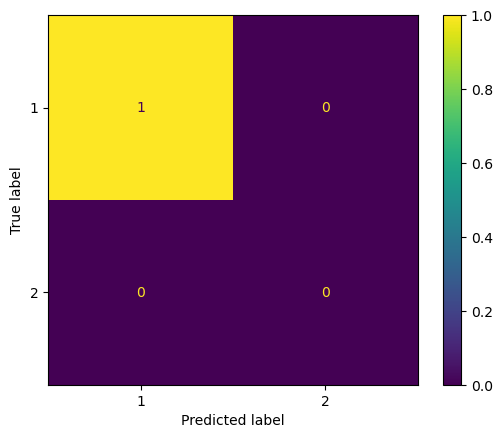

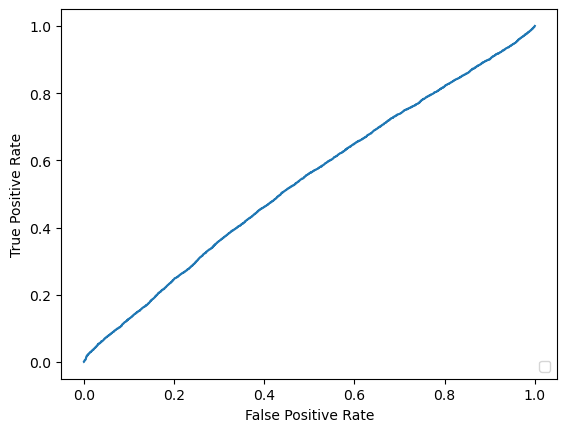

In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = LogisticRegression(penalty='l2', C=1, solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize='true',labels=[1,2])
print(f'Confusion matrix:\n {cm}\n')

cm_display = ConfusionMatrixDisplay(cm,display_labels=[1,2]).plot()

y_score = model.decision_function(X_test)
# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

C:\Users\aldoe\AppData\Local\Temp\ipykernel_45092\1559578659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Has_Special_Char'] = df_lr['Name'].str.contains(special_char_pattern)


Accuracy: 0.86

Confusion matrix:
 [[1. 0.]
 [0. 0.]]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


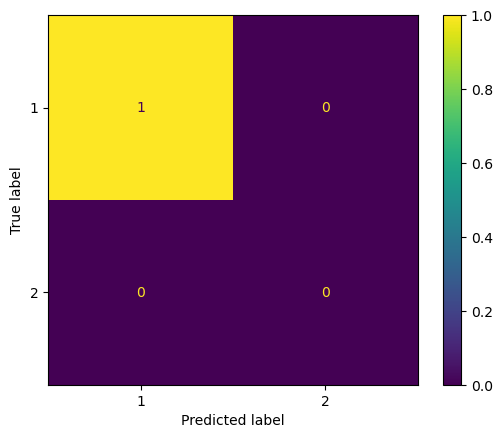

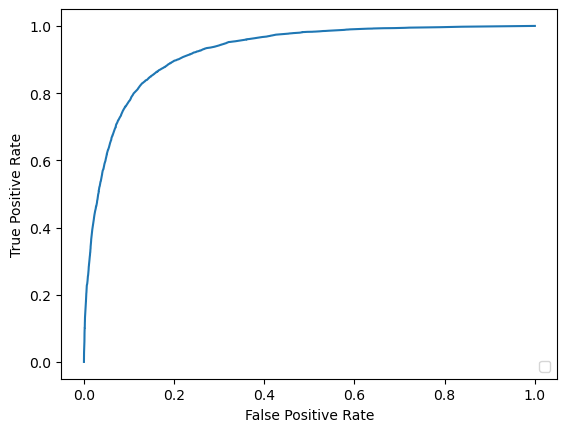

In [28]:
df_lr = df_names[~df_names['Has_Special_Char']]
df_lr['Has_Special_Char'] = df_lr['Name'].str.contains(special_char_pattern)
df_lr = df_lr.drop(columns='Has_Special_Char', axis =1)

df_lr['l3_letters'] = df_lr['Name'].str[-3:]
df_lr['l2_letters'] = df_lr['Name'].str[-2:]
df_lr['l1_letters'] = df_lr['Name'].str[-1:]

df_lr = df_lr.drop('Count', axis=1)
df_lr = df_lr.drop('length', axis=1)
df_lr = df_lr.drop('Name', axis=1)

df_lr = pd.get_dummies(df_lr, columns=['l3_letters', 'l2_letters', 'l1_letters'])

X = df_lr.drop(columns='Gender')
y = df_lr['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = LogisticRegression(penalty='l2', C=1, solver='saga')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true',labels=[1,2])
print(f'Confusion matrix:\n {cm}\n')

cm_display = ConfusionMatrixDisplay(cm,display_labels=[1,2]).plot()

y_score = model.decision_function(X_test)
# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [32]:
y_pred = model.predict(X_test)
print("Predicted value:\n", y_pred[0:10])
print("Real value:\n", y_test[0:10])

Predicted value:
 [0 0 0 0 0 0 1 0 1 0]
Real value:
 1374      0
24787     0
120704    0
5603      0
78746     0
132963    0
7622      0
58195     0
65859     1
87274     0
Name: Gender, dtype: int64


In [33]:
# 7622
df_names.loc[7622]

Name                 Anel
Gender                  0
Count                1849
length                  4
Has_Special_Char    False
Name: 7622, dtype: object

## Random Forest vs LIGHT GBM

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [47]:
df_lgbm = df_names[~df_names['Has_Special_Char']]
df_lgbm['Has_Special_Char'] = df_lgbm['Name'].str.contains(special_char_pattern)
df_lgbm = df_lgbm.drop(columns='Has_Special_Char', axis =1)

df_lgbm['l3_letters'] = df_lgbm['Name'].str[-3:]
df_lgbm['l2_letters'] = df_lgbm['Name'].str[-2:]
df_lgbm['l1_letters'] = df_lgbm['Name'].str[-1:]

df_lgbm = pd.get_dummies(df_lgbm, columns=['l3_letters', 'l2_letters', 'l1_letters'])

df_lgbm = df_lgbm.drop('Count', axis=1)
df_lgbm = df_lgbm.drop('length', axis=1)
df_lgbm = df_lgbm.drop('Name', axis=1)

X = df_lgbm.drop(columns='Gender')
y = df_lgbm['Gender']

X

C:\Users\aldoe\AppData\Local\Temp\ipykernel_45092\1262676082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lgbm['Has_Special_Char'] = df_lgbm['Name'].str.contains(special_char_pattern)


,l3_letters_Ab,l3_letters_Aba,l3_letters_Abb,l3_letters_Abd,l3_letters_Abe,l3_letters_Abi,l3_letters_Abu,l3_letters_Aby,l3_letters_Ac,l3_letters_Ace,...,l1_letters_q,l1_letters_r,l1_letters_s,l1_letters_t,l1_letters_u,l1_letters_v,l1_letters_w,l1_letters_x,l1_letters_y,l1_letters_z
106986,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
133678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
44862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lgb = lgb.LGBMClassifier()

parameters = {'num_leaves':[100], 'min_child_samples':[15], 'max_depth':[20],
              'learning_rate':[0.2], 'reg_alpha':[0.03]}

clf = GridSearchCV(lgb, parameters, cv = 2)
clf.fit(X=X_train, y = y_train)

[LightGBM] [Info] Number of positive: 12795, number of negative: 21808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 34603, number of used features: 636
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369766 -> initscore=-0.533222
[LightGBM] [Info] Start training from score -0.533222
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2], 'max_depth': [20],
                         'min_child_samples': [15], 'num_leaves': [100],
                         'reg_alpha': [0.03]})

In [53]:
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
a = pd.crosstab(y_test, predictions)
print(score)
print(a.max(axis=1)/a.sum(axis=1))

0.8514044619119177
Gender
0    0.886195
1    0.792362
dtype: float64


In [56]:
print('Predicted values:\n', predictions[0:10])
print("Tested values:\n", y_test[0:10])

Predicted values:
 [0 1 0 1 1 0 0 0 0 1]
Tested values:
 9492      0
132765    1
91231     0
54276     0
36871     1
67194     0
92376     0
108262    0
112807    1
109104    1
Name: Gender, dtype: int64
